## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import warnings
warnings.filterwarnings("ignore")

## **Load the Original Parameters Image**

In [2]:
parameter_img = rasterio.open("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\Rasters\Maldah_Flood_Parameters.tif")

In [3]:
# Store the image parameters in separate variables
bandNum = parameter_img.count
height = parameter_img.height
width = parameter_img.width
crs = parameter_img.crs
transform = parameter_img.transform
shape = (height, width)

## **Read the Image as DataFrame**

In [4]:
image = pd.read_csv("D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\CSVs\Image_CSV.csv")
image

,Unnamed: 0,Dist_to_River,TWI,Rainfall,Clay_Content,TRI,NDVI,MFI,Elevation,MNDWI,...,Geomorphology_Active_Flood_Plain,Geomorphology_Older_Alluvial_Plain,Geomorphology_Older_Flood_Plain,Lithology_Cl_wi_S_Si_Ir_N,Lithology_Fe_Ox_S_Si_Cl,Lithology_S_Si_Cl,Lithology_S_Si_Cl_wi_Cal_Co,LULC_Agricultural_Field,LULC_Built_UP_Area,LULC_Natural_Vegetation
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7680712,7680712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7680713,7680713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7680714,7680714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7680715,7680715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Remove unnecessary column
image.drop("Unnamed: 0", axis=1, inplace=True)

## **Load the Models**

In [6]:
import pickle

In [23]:
# Import the models
rf_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\rf_model.pkl"
xgb_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\xgb_model.pkl"
adb_model_path = r"D:\Coding\Git Repository\Research Repo\Flood\Flood-Susceptibility-Zonation-of-Maldah\Model\adb_model.pkl"

rf_model = pickle.load(open(rf_model_path, "rb"))
xgb_model = pickle.load(open(xgb_model_path, "rb"))
adb_model = pickle.load(open(adb_model_path, "rb"))

In [8]:
rf_model

RandomForestClassifier(criterion='entropy', max_features=0.4, max_samples=1.0,
                       min_samples_leaf=8, min_samples_split=8,
                       n_estimators=50)

In [9]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
adb_model

AdaBoostClassifier(learning_rate=0.5, n_estimators=100)

In [10]:
rf_model.feature_names_in_

array(['Dist_to_River', 'TWI', 'Rainfall', 'Clay_Content', 'TRI', 'NDVI',
       'MFI', 'Elevation', 'MNDWI', 'Drainage_Density',
       'Geomorphology_Active_Flood_Plain',
       'Geomorphology_Older_Alluvial_Plain',
       'Geomorphology_Older_Flood_Plain', 'Lithology_Cl_wi_S_Si_Ir_N',
       'Lithology_Fe_Ox_S_Si_Cl', 'Lithology_S_Si_Cl',
       'Lithology_S_Si_Cl_wi_Cal_Co', 'LULC_Agricultural_Field',
       'LULC_Built_UP_Area', 'LULC_Natural_Vegetation'], dtype=object)

## **Classify the Image**

### **Classify the Image with Random Forest**

In [12]:
# Classify the image with RF Model
rf_predict = rf_model.predict(image)

In [14]:
# Predict the Probability of Classification 
rf_predict_prob = rf_model.predict_proba(image)
rf_predict_prob = rf_predict_prob[:, 1]
rf_predict_prob

array([0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
       0.65769961])

In [15]:
# Reshape the array
rf_classified_image = rf_predict_prob.reshape((3267, 2351))
rf_classified_image

array([[0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961],
       [0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961],
       [0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961],
       ...,
       [0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961],
       [0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961],
       [0.65769961, 0.65769961, 0.65769961, ..., 0.65769961, 0.65769961,
        0.65769961]])

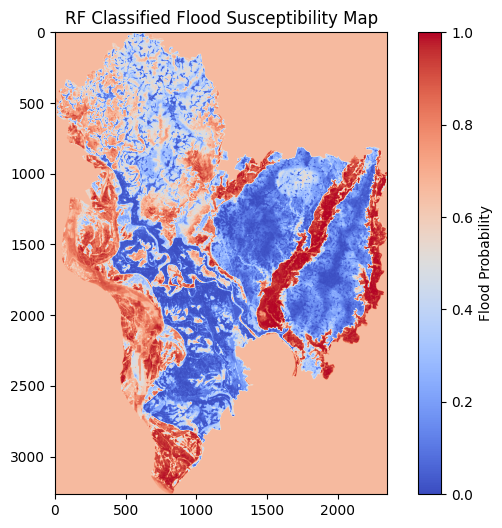

In [16]:
# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(rf_classified_image, cmap="coolwarm")
plt.title("RF Classified Flood Susceptibility Map")
plt.colorbar(label="Flood Probability")
plt.show()

### **Classify the Image with Xgboost**

In [13]:
# Classify the image with Xgboost Model
xgb_predict = xgb_model.predict(image)

In [17]:
# Predict the Probability of Classification 
xgb_predict_prob = xgb_model.predict_proba(image)
xgb_predict_prob = xgb_predict_prob[:, 1]
xgb_predict_prob

array([0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
       0.73214984], dtype=float32)

In [18]:
# Reshape the array
xgb_classified_image = xgb_predict_prob.reshape((3267, 2351))
xgb_classified_image

array([[0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984],
       [0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984],
       [0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984],
       ...,
       [0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984],
       [0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984],
       [0.73214984, 0.73214984, 0.73214984, ..., 0.73214984, 0.73214984,
        0.73214984]], dtype=float32)

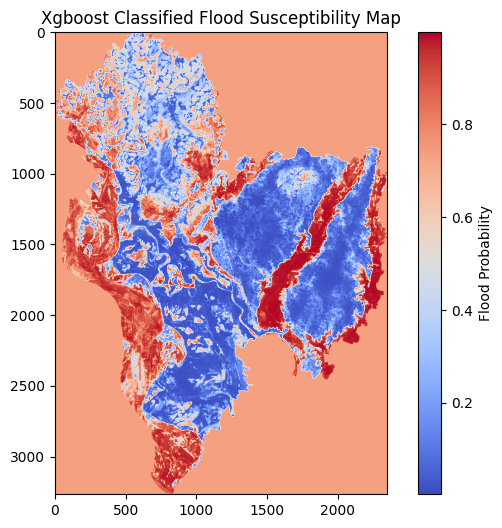

In [19]:
# Plot the image
plt.figure(figsize=(8, 6))
plt.imshow(xgb_classified_image, cmap="coolwarm")
plt.title("Xgboost Classified Flood Susceptibility Map")
plt.colorbar(label="Flood Probability")
plt.show()

## **Export the Images**

In [22]:
# Save the image to the file
# folder_path = r"D:\Research Works\Flood\Flood_Risk_Zonation_of_Maldah\Datasets\Rasters\Outputs"
# file_name = "\RF_Flood_Prob.tif"
# location = folder_path + file_name

# output = rasterio.open(
#     location,
#     mode='w',
#     driver="GTiff",
#     width=parameter_img.shape[1],
#     height=parameter_img.shape[0],
#     count=1,
#     crs=crs,
#     transform=transform,
#     dtype=str(rf_classified_image.dtype),
# )

# output.write(rf_classified_image, 1)
# output.close()